## Análisis de regresión lineal múltiple en ventas de casas
Realizar un análisis de regresión lineal múltiple utilizando las variables independientes `rooms`, `bathrooms` y `surface_total`, para predecir el precio de venta de una vivienda. Para ello, realizar los siguientes pasos:

1. Descargar el dataset `https://datasets-humai.s3.amazonaws.com/datasets/properati_caba_2021.csv`
2. Cargar el dataset en un Dataframe.
3. Dividir el conjunto de datos en datos de entrenamiento y prueba.
4. Ajustar una regresión lineal múltiple utilizando las variables independientes `rooms`, `bathrooms` y `surface_total`.
5. Calcular el R2 y el RMSE del modelo en los conjuntos de entrenamiento y prueba.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

url = "https://datasets-humai.s3.amazonaws.com/datasets/properati_caba_2021.csv"
data = pd.read_csv(url)

## Analizar la distribución de los residuos del modelo
Usando el modelo del ejercicio 4, calcular los residuos en los conjuntos de entrenamiento y prueba, y visualizar su distribución en histograma.

In [2]:
data.head()

,id,lat,lon,l3,rooms,bathrooms,surface_total,surface_covered,price,property_type
0,5dmWZ4uqAU4kpJw0AEc/Hw==,-34.623226,-58.400978,San Cristobal,7.0,6.0,534.0,384.0,470000.0,Casa
1,kFa6ndbLuJ2k2zfzI1fY3A==,-34.561752,-58.461205,Belgrano,1.0,1.0,25.0,25.0,60000.0,Departamento
2,S0fct9jgpfmuqmOaPntC/Q==,-34.617508,-58.384388,Monserrat,1.0,1.0,40.0,40.0,82500.0,Departamento
3,sduUfHxdOh9PuRwJruEcyA==,-34.617508,-58.384388,San Telmo,1.0,1.0,40.0,40.0,82500.0,Departamento
4,Tl1ebIQJyPOXV2XJMEImQg==,-34.617508,-58.384388,Constitución,1.0,1.0,40.0,40.0,82500.0,Departamento


In [3]:
data.columns

Index(['id', 'lat', 'lon', 'l3', 'rooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'property_type'],
      dtype='object')

In [4]:
X = data[['rooms', 'bathrooms', 'surface_total']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = lm.predict(X_test)
y_pred_train = lm.predict(X_train)


In [21]:
residuals = y_test - y_pred
residuals_train = y_train - y_pred_train

r2 = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_pred_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print(f'El r2 es {r2} y el RMSE es {rmse}.')
print(f'El r2 es {r2_train} y el RMSE es {rmse_train}.')

El r2 es 0.5609031564114615 y el RMSE es 217051.06265588282.
El r2 es 0.5750504200890224 y el RMSE es 202311.7187952589.


In [28]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='white', palette='pastel')

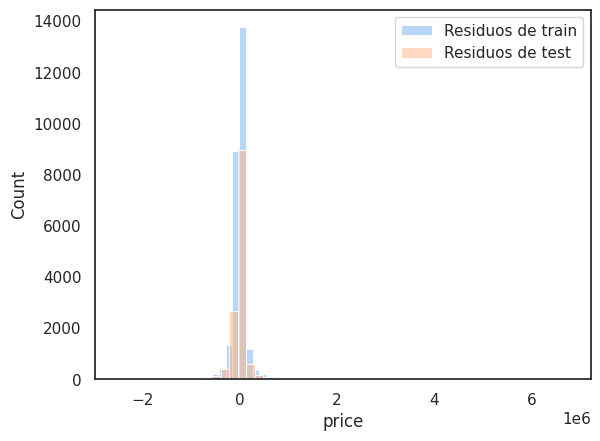

In [32]:
fig, ax = plt.subplots()
sns.histplot(residuals_train, bins=50, ax=ax, label='Residuos de train')
sns.histplot(residuals, bins=50, ax=ax, label='Residuos de test', alpha=0.5)
ax.legend()